<a href="https://colab.research.google.com/github/OctavioGuaschi/IA901-2023S1/blob/main/projetos/notebooks/Splitdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "gdrive/MyDrive/Projeto/data/raw"

Mounted at /content/gdrive


In [ ]:
# Imports

# import the needed libs

from __future__ import print_function, division
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import matplotlib.pyplot as plt
import time
import os
import copy
from google.colab import files

plt.ion()   # interactive mode

In [ ]:
class ImageFolderWithPath(datasets.ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target, path

In [ ]:
image_datasets = ImageFolderWithPath(os.path.join(data_dir))
# Train (60%), Val (20%), Test (20%)
train_size = int(0.6 * len(image_datasets))
test_size = int(0.2 * len(image_datasets))
val_size = len(image_datasets) - train_size - test_size
#train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(image_datasets, [train_size, val_size, test_size])



In [ ]:
train_dataset = [2517, 4156, 2136, 72, 496, 4164, 1279, 1790, 1607, 1877, 1056, 4411, 1549, 213, 1132, 4019, 2579, 408, 138, 4572, 1140, 772, 2064, 2842, 4074, 2245, 4222, 1503, 2932, 953, 4174, 2650, 3387, 2841, 3369, 904, 2990, 2716, 4499, 1472, 3153, 3930, 4152, 1789, 4682, 111, 3582, 2621, 4518, 1301, 1965, 2781, 403, 4353, 2500, 4150, 1701, 1755, 235, 412, 1813, 4016, 93, 4794, 1292, 2546, 1992, 943, 1673, 1539, 179, 2109, 1891, 3069, 3081, 2561, 1613, 4774, 958, 3390, 1309, 2424, 2813, 441, 812, 4038, 916, 2714, 3013, 2807, 2651, 307, 3830, 3334, 2315, 1850, 541, 2101, 1436, 2567, 3150, 1806, 2681, 3887, 4547, 1933, 4007, 3748, 2796, 2997, 2536, 125, 2421, 4767, 405, 4210, 3258, 890, 2849, 2142, 2161, 2556, 2717, 781, 2739, 2202, 1770, 95, 3865, 1135, 1402, 1834, 2587, 3465, 1921, 3914, 1154, 2836, 1960, 1997, 4138, 1949, 4279, 2486, 4249, 3805, 1000, 815, 4041, 994, 1227, 1173, 1911, 1753, 861, 712, 229, 3001, 3364, 3085, 2152, 3123, 2060, 1175, 2547, 4096, 1198, 4224, 1885, 2248, 444, 4195, 4178, 3526, 1741, 3133, 258, 2498, 2296, 4296, 3014, 1271, 2264, 446, 1247, 654, 4532, 1772, 4509, 3257, 780, 1352, 1379, 3497, 1563, 2126, 888, 2534, 2004, 2963, 3964, 1627, 230, 3690, 2660, 4779, 2382, 3383, 1575, 116, 1691, 3618, 1433, 1390, 3626, 1768, 2043, 3162, 3527, 3323, 1085, 651, 2794, 3372, 50, 3940, 2804, 3731, 2757, 1621, 1934, 2230, 3505, 454, 3347, 3973, 2420, 152, 3602, 2444, 2805, 4324, 3161, 4771, 3712, 3786, 595, 1341, 3952, 2291, 4120, 3100, 3864, 3210, 579, 4261, 3808, 1291, 1465, 3876, 8, 1293, 395, 2462, 1900, 2024, 2072, 3559, 3691, 1652, 3079, 3529, 590, 1331, 2363, 4243, 4417, 162, 1469, 123, 3762, 1184, 630, 4368, 2946, 3869, 636, 7, 3315, 3241, 3146, 751, 677, 835, 4080, 2676, 3212, 1777, 1327, 3608, 1307, 2695, 4229, 587, 1510, 128, 2672, 1618, 3515, 3606, 291, 388, 4478, 4729, 1372, 4595, 731, 2499, 4490, 3428, 2780, 4796, 514, 1150, 2257, 1369, 4028, 1283, 2148, 4235, 801, 1852, 3190, 982, 3350, 4366, 2873, 3260, 2238, 882, 4579, 1801, 3192, 4664, 4100, 1779, 1128, 425, 1841, 1664, 337, 4245, 3811, 1385, 2491, 4086, 4439, 259, 2281, 3718, 2542, 2408, 2584, 1438, 3275, 435, 1076, 761, 484, 930, 3861, 1141, 4548, 4308, 3346, 1619, 2224, 3473, 3255, 241, 2544, 1910, 1799, 2563, 3178, 4535, 1172, 2045, 365, 1209, 470, 4537, 4027, 3899, 569, 3824, 4408, 4298, 2640, 2850, 2331, 1591, 2219, 1983, 1294, 207, 3422, 300, 4466, 1888, 859, 3331, 3276, 3065, 1679, 3711, 1079, 3603, 1467, 3957, 3382, 4653, 4740, 2303, 4015, 1698, 4435, 4723, 1905, 469, 3243, 4524, 448, 2221, 4546, 4519, 2470, 2831, 2502, 12, 3435, 1714, 2345, 2985, 705, 4200, 2225, 80, 2475, 1400, 4231, 2523, 629, 4334, 4064, 302, 1015, 4003, 368, 3343, 1964, 723, 5, 4345, 2814, 647, 652, 3947, 2162, 1200, 600, 4265, 352, 1370, 4187, 4560, 244, 139, 2191, 1670, 1859, 3739, 544, 947, 948, 2419, 3797, 4473, 2497, 3086, 1824, 3896, 1915, 4386, 4720, 2900, 3611, 2131, 4262, 4182, 1643, 4485, 823, 46, 1222, 2792, 2208, 4241, 2361, 1162, 4349, 2268, 2182, 3283, 4390, 1893, 3994, 3500, 4230, 158, 3271, 1647, 4274, 3986, 879, 2080, 3392, 10, 1511, 4078, 1047, 2625, 3010, 2939, 3249, 4596, 3543, 1899, 2966, 500, 4158, 1378, 2054, 3550, 2380, 877, 1080, 411, 2975, 2591, 4378, 4175, 2463, 2040, 1733, 3636, 4674, 1396, 3478, 3312, 4566, 3199, 66, 1208, 612, 2474, 312, 4068, 3571, 2098, 588, 798, 3757, 3620, 85, 3136, 3200, 3499, 3206, 2087, 4033, 900, 3679, 803, 1604, 4530, 1181, 2871, 2399, 3599, 4631, 3340, 4297, 3596, 1830, 3048, 1003, 2750, 2636, 4053, 1968, 3121, 3469, 2737, 838, 4477, 4081, 3093, 155, 4140, 3688, 4677, 1767, 1382, 445, 3821, 2868, 4602, 86, 1625, 3822, 4803, 1590, 481, 816, 4023, 4048, 489, 423, 3201, 1415, 1765, 1350, 3297, 1851, 114, 3965, 468, 1624, 3900, 3395, 4489, 2187, 4619, 1756, 905, 2322, 1887, 666, 204, 52, 2251, 524, 3996, 842, 2031, 2604, 2274, 321, 4552, 2718, 1498, 609, 4443, 2698, 2960, 26, 533, 691, 2583, 1234, 3967, 2284, 3915, 2611, 3784, 2427, 231, 698, 4291, 3848, 2237, 2992, 4482, 4184, 3756, 2192, 2710, 534, 3266, 380, 4461, 1192, 2299, 2349, 1608, 4069, 2260, 718, 3485, 1286, 2130, 3588, 4583, 3926, 3227, 2944, 2429, 1285, 1909, 4512, 2779, 3617, 3929, 113, 2047, 804, 3163, 2683, 4555, 1492, 2188, 2179, 3458, 3367, 4578, 2799, 4039, 760, 1854, 4318, 3418, 3472, 4362, 1152, 4013, 1870, 4449, 2365, 3774, 3394, 1297, 553, 4633, 2764, 2648, 3852, 830, 2385, 750, 2865, 3024, 2151, 4719, 2041, 3782, 638, 1760, 4302, 1474, 1988, 4615, 3787, 529, 2386, 2376, 1299, 3538, 1328, 3311, 1053, 1610, 2020, 3834, 769, 3883, 3295, 3880, 1917, 1540, 3116, 2996, 1163, 35, 1005, 3644, 1800, 3641, 1990, 4126, 858, 2678, 907, 2743, 4040, 105, 3005, 2212, 4063, 178, 4463, 3530, 2046, 3777, 3983, 3143, 2406, 944, 3320, 3157, 3908, 2543, 3598, 846, 3886, 4450, 3498, 1803, 1330, 1188, 295, 1033, 1092, 4654, 4606, 161, 2867, 4129, 3349, 118, 728, 755, 867, 3264, 3029, 1719, 1821, 2200, 2702, 3586, 2876, 2358, 1236, 2550, 3083, 2995, 4305, 4668, 4392, 1636, 2165, 3546, 1463, 437, 3398, 3125, 2853, 687, 4107, 193, 3164, 2656, 4110, 4114, 346, 2551, 1466, 3524, 343, 34, 4722, 2883, 3695, 2806, 908, 2785, 4563, 1973, 1773, 1565, 4608, 957, 3585, 3345, 154, 644, 333, 4651, 664, 2214, 2222, 502, 2160, 917, 3991, 426, 4487, 2731, 1556, 4153, 3909, 4607, 2752, 104, 4655, 3662, 1514, 3972, 3467, 860, 2812, 4163, 223, 4001, 1448, 2933, 2432, 1999, 3548, 3459, 464, 2733, 250, 2466, 3594, 4652, 2104, 287, 183, 2800, 2379, 263, 960, 1688, 1615, 73, 1287, 1578, 1494, 1669, 3021, 4809, 1362, 1516, 3160, 1582, 4199, 1206, 615, 1694, 2721, 2962, 3152, 2065, 2006, 2854, 2352, 1425, 4527, 2371, 1480, 811, 2549, 2368, 1740, 986, 479, 2982, 4125, 2564, 1827, 354, 4313, 2493, 4701, 2176, 2323, 3144, 775, 275, 1038, 1508, 886, 603, 277, 2895, 1769, 3823, 2509, 2441, 401, 680, 1359, 4101, 4403, 1970, 4777, 565, 3147, 3310, 564, 1747, 2206, 3732, 513, 4662, 1623, 1522, 102, 4131, 3245, 2539, 345, 172, 3669, 1136, 1077, 3115, 512, 2164, 3555, 828, 2194, 3800, 1726, 594, 4122, 3714, 4149, 650, 327, 3229, 2670, 3761, 2141, 3906, 2899, 4102, 3411, 2337, 486, 3197, 1928, 4694, 1139, 4263, 4236, 3156, 4284, 2987, 4753, 3027, 2259, 619, 410, 129, 1975, 3921, 3281, 1814, 4755, 3268, 3187, 639, 1597, 871, 1545, 1229, 3399, 2788, 3137, 2869, 1612, 1346, 1147, 797, 4272, 504, 984, 730, 4119, 1880, 1046, 3151, 2467, 1395, 1237, 3809, 737, 1476, 4639, 2426, 3188, 1660, 792, 3448, 3572, 29, 2324, 1193, 950, 304, 3058, 3514, 1938, 4384, 3727, 915, 199, 4258, 3729, 485, 1084, 3108, 1443, 1805, 540, 1531, 625, 1995, 2837, 2609, 1070, 278, 1923, 4167, 3195, 3047, 1635, 3999, 4300, 2973, 1629, 4495, 1989, 851, 174, 4613, 967, 482, 2986, 255, 1922, 74, 1754, 708, 954, 3577, 4702, 3351, 2735, 2945, 1981, 4201, 1569, 669, 4457, 3528, 1797, 682, 1277, 1924, 2262, 952, 2693, 2791, 4295, 4379, 2598, 2763, 4215, 2823, 1775, 2434, 3920, 1697, 160, 4625, 4116, 2042, 2007, 2771, 3980, 281, 3446, 4292, 4398, 4717, 1108, 3, 857, 18, 1384, 4624, 2036, 4676, 2581, 55, 2576, 2789, 1230, 30, 1037, 4673, 1189, 4594, 1280, 1751, 1936, 2453, 2892, 2311, 379, 1991, 2746, 61, 90, 3675, 4098, 3719, 2751, 670, 1784, 1246, 1493, 4247, 211, 3760, 2527, 1677, 1913, 2418, 783, 400, 4317, 3128, 1071, 2908, 2682, 271, 1251, 1645, 1095, 4640, 1641, 1333, 2943, 995, 317, 3726, 3556, 2119, 4590, 3325, 776, 661, 1520, 2485, 3911, 4008, 2957, 1252, 3122, 988, 2422, 1764, 875, 2388, 4769, 1653, 2471, 4179, 3439, 4679, 3501, 2528, 4123, 3301, 1603, 742, 3442, 1470, 1340, 2122, 1630, 1788, 265, 1460, 1958, 3907, 3389, 945, 601, 2289, 3989, 2489, 765, 3654, 2647, 3927, 3850, 39, 4616, 2863, 2606, 228, 2828, 690, 584, 3380, 3224, 4569, 560, 642, 4406, 3511, 2947, 3080, 4431, 909, 243, 2748, 3142, 2307, 142, 645, 3884, 3946, 4375, 873, 3244, 3430, 4, 2070, 2597, 3433, 146, 373, 613, 2456, 3070, 4085, 3007, 2668, 2654, 4282, 329, 3706, 3131, 313, 2667, 1897, 2255, 3600, 3579, 4250, 4644, 2295, 2013, 421, 4573, 1290, 96, 3537, 892, 3179, 1576, 296, 1444, 3170, 2909, 4688, 1675, 4240, 627, 126, 4270, 1145, 4095, 83, 3454, 596, 1857, 6, 2232, 1114, 1091, 475, 4782, 1737, 962, 4321, 1217, 605, 4785, 1529, 2552, 1464, 1810, 184, 2056, 2554, 2642, 850, 840, 1954, 3870, 2776, 2938, 3533, 2011, 3371, 621, 1224, 3035, 3008, 1985, 1423, 4621, 1702, 1410, 4454, 2391, 659, 1316, 253, 4285, 1555, 663, 2, 3734, 3401, 3525, 4128, 4693, 1179, 3858, 3810, 2754, 2278, 794, 1926, 3625, 1414, 3629, 68, 3860, 4586, 2772, 2414, 2428, 4480, 3670, 3400, 1791, 4550, 1332, 2595, 196, 1553, 2229, 1738, 306, 2310, 3941, 934, 3366, 4793, 4232, 2959, 238, 1228, 134, 4401, 2619, 4047, 4360, 1062, 2153, 297, 643, 1699, 2937, 3857, 1896, 2402, 3647, 4207, 4587, 3112, 1318, 918, 2592, 3951, 623, 112, 511, 1551, 1202, 4316, 3031, 1614, 885, 3339, 1916, 430, 236, 3298, 891, 1113, 1833, 1932, 771, 3284, 1007, 2177, 2643, 2758, 3747, 59, 3251, 558, 3520, 1534, 868, 2001, 1455, 2169, 2411, 3403, 498, 3040, 1730, 491, 3423, 3922, 1812, 2907, 510, 3778, 94, 946, 1919, 1918, 3997, 3684, 4685, 4545, 1049, 2058, 3583, 4237, 1259, 3412, 1250, 279, 2335, 757, 1446, 136, 311, 3702, 1898, 3042, 2626, 3665, 4445, 3843, 133, 383, 124, 3342, 4591, 2825, 4035, 4715, 3002, 4319, 4483, 4695, 3779, 1051, 3534, 1731, 2052, 3885, 532, 3003, 188, 4713, 2285, 2147, 1943, 1127, 725, 3689, 3510, 1771, 618, 922, 4423, 239, 3280, 3788, 1488, 4456, 4425, 854, 4097, 3631, 371, 4332, 4498, 1231, 3285, 1706, 1102, 1908, 23, 721, 25, 2423, 4458, 3110, 3614, 3768, 1191, 1552, 1712, 2121, 3938, 1757, 971, 3094, 4188, 4115, 2679, 1856, 110, 3547, 1457, 3833, 1972, 4257, 833, 4104, 4770, 3452, 4271, 616, 1138, 3971, 3404, 4169, 3451, 1700, 2091, 206, 1863, 377, 4433, 69, 4221, 2958, 2298, 3006, 981, 232, 4567, 3449, 200, 2874, 2313, 181, 2919, 339, 1447, 2580, 2594, 1081, 429, 16, 282, 2610, 3807, 1171, 4641, 2917, 2211, 2348, 2885, 3668, 245, 3018, 369, 3724, 1212, 4650, 2183, 1722, 2215, 1027, 2305, 3332, 3341, 1802, 2189, 2665, 341, 2773, 166, 3221, 3000, 4170, 3129, 3798, 1393, 3140, 1724, 2691, 3111, 2387, 1375, 912, 1871, 724, 1512, 2728, 3222, 294, 4377, 1357, 4491, 1749, 1866, 4132, 2457, 1010, 3139, 4799, 3763, 490, 2974, 4287, 1072, 3974, 2816, 3683, 3539, 0, 706, 20, 2766, 2786, 144, 2525, 1137, 3154, 2903, 1562, 689, 1646, 2755, 130, 4083, 624, 4021, 3666, 2673, 4277, 2350, 4283, 1650, 827, 4556, 653, 3902, 866, 4280, 4109, 466, 3308, 3950, 4220, 3725, 2819, 1804, 1223, 2663, 3250, 3963, 4307, 1221, 4130, 4609, 4176, 2269, 237, 3309, 1347, 2747, 874, 2588, 970, 2706, 2185, 979, 1829, 3934, 2880, 2866, 1763, 2166, 4479, 4711, 4525, 1133, 2413, 521, 2327, 4508, 2783, 2898, 3317, 2989, 1002, 1183, 4365, 3925, 4564, 1068, 906, 3794, 2558, 1377, 4754, 1665, 416, 1780, 3226, 702, 3316, 4075, 436, 2193, 4335, 1054, 1060, 4765, 999, 3717, 4494, 2243, 1458, 1952, 895, 2293, 2608, 3155, 190, 3610, 2835, 1828, 2753, 4757, 322, 1120, 1269, 4542, 4225, 2905, 189, 2725, 2915, 1658, 3627, 2357, 1809, 732, 326, 3954, 3453, 2912, 361, 3806, 4710, 3119, 1683, 2236, 2372, 752, 2446, 2994, 3431, 3050, 4600, 251, 3416, 4663, 3396, 2452, 4072, 289, 1710, 3066, 3623, 100, 415, 949, 4612, 2712, 1371, 1118, 222, 1984, 1872, 3082, 4067, 449, 2468, 992, 4637, 1637, 2875, 1441, 1045, 4228, 1109, 4737, 3716, 1956, 2980, 4018, 3981, 1692, 254, 4732, 3307, 3674, 1867, 1759, 3890, 3569, 212, 4025, 3592, 3169, 526, 2971, 1157, 3575, 3196, 2265, 820, 197, 2438, 3838, 754, 549, 3664, 662, 2196, 2541, 3273, 1695, 1405, 1907, 3868, 2927, 1864, 4488, 4665, 578, 2367, 2233, 2454, 9, 1808, 147, 1927, 1030, 2213, 1195, 4351, 1315, 3847, 1170, 3218, 617, 1142, 78, 2490, 2002, 2659, 2774, 2242, 4094, 2057, 4599, 4031, 1160, 476, 4632, 4544, 3643, 1134, 4789, 2252, 393, 2635, 2239, 2575, 1044, 3319, 3849, 2369, 2628, 2709, 1065, 2585, 4659, 1573, 210, 2481, 1542, 2339, 2970, 660, 3790, 4716, 1257, 2448, 3114, 4418, 607, 3127, 2306, 739, 3521, 4683, 2436, 3705, 2859, 3259, 622, 799, 1865, 81, 1657, 3159, 961, 1945, 3931, 2928, 672, 599, 1383, 3252, 460, 157, 4707, 1204, 3565, 3998, 3818, 3912, 1164, 375, 1979, 4437, 3969, 1750, 2145, 1963, 4099, 143, 4246, 3638, 2003, 4045, 4538, 2744, 1462, 1530, 443, 1517, 4165, 1126, 4336, 4570, 4746, 1501, 3932, 1971, 3570, 3253, 2596, 1, 3338, 3034, 1086, 1263, 3290, 215, 409, 3223, 2742, 2832, 1262, 262, 2661, 4434, 3681, 4708, 4470, 3213, 224, 3102, 2506, 38, 2333, 1311, 2847, 2730, 4173, 1104, 3522, 62, 1976, 3425, 4341, 1326, 2818, 4714, 2267, 4395, 4680, 340, 4671, 686, 4657, 1289, 4166, 3771, 991, 4648, 4268, 4503, 175, 3141, 1663, 1042, 1098, 2079, 319, 195, 3773, 1174, 4060, 2533, 2894, 2263, 4009, 2484, 2084, 356, 3759, 1639, 3171, 4209, 3979, 3919, 3181, 2666, 3709, 219, 3075, 3447, 3456, 1794, 3039, 4678, 4233, 4744, 3322, 2657, 3304, 1787, 887, 4629, 3413, 4588, 1873, 362, 4582, 1994, 1745, 2570, 3897, 774, 4501, 1304, 3945, 1620, 3653, 3841, 4340, 631, 1176, 1570, 4006, 3441, 4254, 2736, 1220, 778, 1361, 4636, 556, 2808, 1881, 447, 1344, 4412, 4253, 2922, 4467, 3355, 707, 1125, 3616, 974, 2480, 2627, 2309, 3721, 3827, 359, 3799, 2301, 4577, 3740, 397, 4151, 440, 477, 2593, 4267, 1544, 3084, 2437, 856, 3609, 33, 2144, 4065, 2503, 1398, 4168, 4459, 3420, 4638, 4211, 4697, 471, 2931, 387, 151, 1977, 4486, 4699, 3353, 4146, 853, 1937, 2793, 3837, 4071, 3386, 1572, 2732, 4780, 633, 863, 4293, 1631, 2631, 3878, 2983, 4447, 2449, 4604, 2811, 2107, 628, 4000, 501, 3185, 4112, 4584, 3044, 3576, 3286, 3113, 4523, 1197, 1837, 4562, 3429, 4781, 2094, 1207, 4451, 1832, 3628, 1403, 2158, 3764, 1149, 1704, 1711, 2858, 819, 1524, 97, 488, 1096, 4154, 3789, 3804, 4127, 506, 1063, 829, 574, 1238, 2511, 989, 3220, 2030, 1057, 3090, 117, 3976, 4741, 2415, 2964, 1399, 2005, 3358, 4430, 2641, 1617, 575, 3217, 3130, 547, 2373, 3165, 2150, 4108, 3009, 2459, 3741, 2115, 1308, 2979, 1186, 3354, 2102, 4414, 2156, 4576, 4370, 4709, 2097, 3427, 3191, 1955, 2015, 266, 2901, 4521, 3299, 4171, 1883, 876, 392, 913, 11, 668, 692, 518, 3495, 1129, 931, 800, 3055, 509, 4136, 4513, 531, 3493, 536, 4768, 720, 2254, 2342, 3557, 4358, 1168, 4444, 2829, 2246, 1066, 4325, 60, 2451, 2802, 324, 2696, 1684, 3844, 2377, 571, 3803, 3984, 2120, 2526, 831, 1912, 3949, 4290, 1312, 1532, 4011, 4029, 4497, 3601, 2760, 3686, 4367, 2689, 2407, 3440, 3482, 3321, 3682, 2634, 2086, 1190, 3376, 2012, 2134, 3368, 2356, 4420, 268, 4177, 1533, 4462, 3707, 1018, 4046, 315, 4056, 1566, 4448, 3480, 3758, 2403, 67, 4389, 1343, 1219, 883, 3279, 3958, 1920, 4216, 240, 4790, 1244, 1401, 1031, 3180, 1507, 1680, 4705, 4559, 4191, 2069, 1215, 4409, 3567, 4469, 3917, 567, 591, 4073, 180, 2083, 657, 3236, 4181, 3881, 2535, 1782, 1016, 2273, 2425, 2170, 788, 3708, 4465, 2692, 3814, 4585, 3333, 3012, 3584, 4541, 3097, 451, 3558, 2704, 2317, 656, 1853, 2412, 2343, 2133, 2089, 17, 597, 568, 2879, 4689, 585, 1744, 561, 1001, 122, 1266, 4623, 1226, 2685, 1216, 140, 980, 2143, 2607, 4575, 3072, 646, 4413, 103, 314, 1969, 320, 3597, 2218, 2488, 3605, 3581, 2397, 455, 1363, 2952, 57, 4402, 2890, 671, 4361, 2312, 3775, 494, 935, 248, 1143, 4251, 1862, 2940, 2440, 1093, 1736, 4082, 3337, 2129, 1599, 1822, 2677, 4066, 14, 1243, 3933, 1144, 852, 3424, 3235, 4014, 427, 4571, 2300, 2286, 4646, 921, 4528, 3549, 499, 3318, 1715, 4118, 3859, 3918, 4203, 3379, 3948, 2872, 2707, 1478, 1009, 897, 135, 834, 3174, 79, 3935, 332, 1456, 3872, 2082, 267, 3693, 848, 1483, 1116, 1816, 1941, 1689, 1982, 4373, 1014, 1687, 3889, 3303, 1811, 433, 3580, 1381, 2396, 3415, 2862, 2734, 1939, 1107, 4783, 4634, 3126, 2722, 602, 2059, 2381, 4355, 773, 996, 762, 2653, 2319, 1256, 4726, 3842, 745, 1783, 2250, 3076, 4160, 4712, 1600, 3943, 276, 3812, 2217, 2029, 782, 1843, 3894, 2645, 1595, 3977, 741, 1882, 1296, 2848, 186, 3553, 3207, 2340, 1035, 2450, 1826, 2000, 2168, 3132, 727, 2010, 4686, 3409, 4502, 2203, 227, 3966, 1860, 936, 1819, 22, 1017, 1894, 1482, 1980, 2965, 2022, 634, 1634, 2304, 2646, 4087, 4256, 3017, 4088, 543, 1205, 63, 3634, 3462, 1901, 4309, 736, 3272, 3936, 4762, 2492, 1123, 3256, 808, 973, 257, 1073, 2942, 3649, 1416, 1355, 4326, 4137, 4278, 1845, 1855, 344, 3474, 1668, 2530, 201, 1284, 3672, 2719, 2967, 1131, 1890, 1012, 977, 1110, 3361, 1659, 1022, 2870, 1601, 3109, 1249, 3483, 1584, 2139, 2105, 1484, 3314, 2826, 3059, 288, 1682, 2197, 3723, 3362, 1365, 1024, 1151, 1437, 4603, 2085, 1748, 1605, 1593, 4687, 150, 1506, 1282, 3962, 4543, 3853, 586, 3278, 3300, 538, 2936, 3068, 173, 2443, 1450, 1807, 3344, 4394, 1481, 3062, 4730, 217, 2906, 3532, 1430, 3089, 847, 2655, 363, 1674, 822, 1088, 4304, 965, 998, 3445, 4536, 2034, 2174, 3820, 4234, 796, 168, 3895, 261, 1950, 1662, 3589, 1278, 4314, 4496, 4614, 2578, 2244, 4660, 1101, 2292, 1774, 2930, 790, 4798, 3905, 3968, 1349, 515, 2508, 386, 163, 290, 779, 3063, 77, 3240, 3836, 604, 676, 1099, 3698, 978, 2827, 4808, 1815, 2117, 156, 3655, 3676, 1267, 3216]

val_dataset = [3030, 4387, 3783, 3051, 2886, 2577, 1334, 1998, 1527, 2270, 1387, 2516, 3715, 620, 2723, 550, 4558, 3678, 109, 2062, 1666, 4441, 3426, 1678, 1622, 2240, 2154, 2210, 3087, 3769, 472, 2852, 2560, 2574, 747, 2390, 1058, 182, 355, 298, 1245, 3461, 4344, 2067, 4656, 3637, 2271, 1931, 3508, 1844, 3277, 805, 2234, 3168, 1258, 3873, 2016, 2127, 1412, 3660, 893, 1159, 4026, 717, 2318, 1902, 4452, 233, 3825, 2759, 2035, 45, 1672, 2283, 2519, 4124, 247, 2088, 1574, 744, 1690, 2887, 2404, 2686, 4310, 1337, 701, 933, 4299, 4472, 2184, 3193, 3518, 4534, 889, 1766, 4134, 285, 378, 3232, 3750, 3306, 969, 2066, 1485, 1201, 2063, 2393, 3659, 1477, 2993, 1008, 2830, 4328, 214, 1013, 13, 2132, 334, 2720, 4189, 4327, 1869, 3781, 336, 2416, 1586, 1454, 4303, 1568, 198, 4515, 98, 27, 3536, 3327, 746, 2482, 2658, 3189, 4281, 3365, 272, 1253, 814, 1406, 4024, 1496, 4159, 2896, 3956, 3105, 32, 1408, 2566, 1067, 1273, 1264, 1525, 1218, 4788, 364, 2032, 2981, 3228, 2768, 837, 722, 4731, 734, 4551, 1820, 735, 2761, 2803, 704, 1473, 2603, 699, 4061, 527, 3292, 3288, 1424, 2178, 709, 4724, 678, 2540, 1717, 2297, 1727, 4194, 3088, 4212, 1418, 548, 2383, 2344, 1696, 2375, 260, 2929, 2926, 4429, 2231, 626, 1360, 2092, 2314, 4020, 703, 4593, 3517, 2355, 4330, 4148, 203, 127, 1032, 2520, 1004, 389, 4592, 3282, 1606, 2961, 593, 710, 1177, 2282, 3148, 2027, 4814, 3262, 849, 2220, 2674, 1886, 2505, 2815, 1011, 2103, 937, 713, 3124, 1420, 809, 107, 841, 3261, 3064, 4369, 810, 3004, 390, 2207, 1336, 2999, 1165, 4627, 3408, 2977, 4468, 1795, 3073, 132, 461, 374, 4791, 1419, 205, 4561, 4079, 2172, 1953, 1951, 4460, 4453, 872, 4058, 305, 4144, 2545, 1354, 3098, 2904, 4338, 3615, 855, 1121, 75, 1325, 4481, 4455, 1023, 3373, 3955, 683, 1761, 2770, 2510, 1233, 1064, 1185, 4589, 3145, 234, 3642, 3328, 2023, 3630, 635, 1300, 2472, 2071, 3523, 2410, 3613, 3743, 3888, 2699, 3745, 1633, 4440, 2954, 4354, 1543, 3247, 1451, 766, 458, 1858, 15, 342, 4037, 2341, 3421, 1786, 3752, 1449, 3982, 4032, 1364, 4533, 3755, 1966, 2613, 1435, 3944, 1265, 4312, 4339, 3730, 2738, 3840, 4540, 3496, 2038, 2329, 191, 3374, 3391, 570, 1515, 413, 4681, 573, 3444, 3923, 4057, 434, 3685, 3831, 2124, 2146, 1479, 4428, 2026, 2330, 1417, 2050, 3313, 2935, 530, 4012, 3211, 878, 3120, 1594, 3056, 1598, 3772, 3046, 3845, 580, 1322, 2276, 1546, 1500, 1875, 2430, 2477, 2784, 2114, 932, 667, 928, 1288, 963, 1199, 545, 53, 40, 1373, 813, 3793, 353, 2745, 1725, 2266, 3650, 2840, 4275, 1203, 1394, 2431, 382, 4725, 1874, 3854, 2458, 4773, 456, 309, 1274, 3648, 3892, 4691, 404, 422, 1187, 3177, 537, 1987, 1313, 1475, 2308, 4557, 2529, 4605, 2600, 3405, 4244, 2573, 4514, 4396, 4442, 1211, 2159, 323, 148, 869, 1831, 4329, 2914, 1153, 2817, 4661, 3753, 1655, 3893, 2538, 2113, 3463, 924, 4580, 483, 2316, 923, 3504, 767, 4342, 4792, 3587, 4385, 4813, 2155, 1339, 4517, 925, 4331, 4574, 2325, 2009, 4400, 795, 4776, 914, 2095, 3646, 3516, 1792, 1940, 286, 2756, 3667, 2705, 3269, 2605, 3359, 1155, 4510, 1560, 3492, 1632, 1835, 274, 3437, 3214, 3487, 528, 1611, 2925, 2991, 4749, 4410, 3407, 2623, 4223, 3722, 3656, 3378, 959, 2290, 308, 3622, 3749, 1959, 2911, 4504, 554, 2797, 1178, 4062, 2392, 4635, 2711, 3434, 2680, 2834, 2701, 582, 3166, 927, 743, 1878, 2697, 845, 2336, 3612, 3049, 1397, 1709, 2037, 606, 864, 964, 2496, 280, 3916, 3484, 2039, 3541, 714, 1119, 3910, 4117, 1588, 1550, 3913, 3490, 4690, 1495, 3274, 1889, 3173, 3289, 64, 3020, 3867, 3457, 844, 2910, 4628, 3871, 3352, 3238, 3158, 1491, 3134, 4371, 3053, 1676, 106, 1825, 2504, 516, 2149, 428, 2555, 4581, 4415, 2195, 806, 1716, 2272, 3817, 3635, 926, 2445, 1743, 3436, 1713, 910, 4738, 4812, 4529, 438, 614, 817, 2205, 396, 3036, 3978, 807, 1431, 2532, 2180, 694, 740, 4004, 4208, 2068, 1705, 3302, 171, 2924, 1638, 2157, 1358, 1944, 726, 2351, 3233, 4357, 862, 159, 3736, 370, 1020, 903, 1321, 1235, 2617, 4196, 3471, 381, 2741, 1640, 76, 3237, 328, 3658, 4464, 2798, 4811, 4333, 3542, 1342, 1962, 3477, 1048, 4475, 2249, 551, 4276, 3239, 3694, 141, 576, 2749, 24, 2589, 4054, 384, 3468, 563, 4553, 3959, 2209, 4226, 4070, 1323, 681, 1778, 2590, 1823, 3071, 3417, 1281, 330, 2988, 4421, 4471, 1182, 1156, 3875, 3744, 2135, 293, 1518, 1519, 896, 3791, 1078, 1069, 1052, 4323, 4787, 3866, 3095, 993, 1577, 1461, 2860, 2602, 1489, 4598, 292, 3475, 2629, 1776, 1242, 3291, 89, 3882, 21, 1411, 4764, 424, 4696, 1241, 3737, 942, 1589, 256, 3443, 2843, 2483, 357, 2090, 367, 3019, 4739, 3489, 2123, 358, 4700, 2726, 459, 1166, 3785, 1536, 4030, 870, 4748, 2633, 4388, 1445, 3356, 2118, 951, 648, 4801, 4667, 120, 3486, 1567, 3248, 2729, 1298, 2809, 3621, 2378, 2111, 4217, 2948, 3593, 2522, 2951, 3545, 3816, 2514, 1061, 777, 3746, 402, 164, 3564, 1112, 3513, 1111, 3167, 1421, 3713, 4405, 1453, 4618, 1368, 88, 1239, 2664, 4382, 1194, 2216, 4005, 4141, 4383, 2893, 325, 43, 1130, 4675, 2934, 1103, 839, 2332, 4374, 3054, 695, 693, 1649, 3671, 2572, 2601, 3924, 2077, 3175, 1225, 1581, 1338, 1122, 2360, 3149, 3402, 2612, 4704, 3640, 349, 4620, 4549, 503, 1942, 3384, 187, 1319, 898, 4322, 2074, 252, 3680, 149, 2288, 1386, 3106, 3562, 920, 28, 955, 3960, 310, 583, 1842, 3032, 3479, 3639, 2861, 3560, 2019, 2400, 1721, 2366, 2727, 1426, 3700, 4505, 4666, 3795, 1409, 3022, 1329, 1528, 3780, 637, 716, 1351, 1041, 4049, 3687, 169, 4255, 3104, 4133, 4733, 3326, 3829, 209, 4381, 1946, 3939, 1903, 4476, 1428, 1564, 3294, 47, 784, 2409, 956, 1847, 2568, 966, 2669, 1559, 299, 1260, 1303, 1429, 492, 2884, 608, 2014, 2465, 2287, 4059, 37, 4474, 997, 1986, 1089, 1082, 4807, 1752, 4672, 632, 4380, 3856, 1609, 4202, 3138, 1929, 2479, 3357]

test_dataset = [4352, 4092, 4522, 1272, 4507, 1735, 1158, 3370, 121, 4397, 1793, 3839, 1734, 1261, 520, 3466, 450, 517, 1728, 4017, 51, 3720, 1039, 3703, 48, 3661, 505, 598, 1097, 2978, 2275, 4539, 2512, 1504, 4772, 3450, 1849, 3491, 3186, 3544, 1380, 2226, 3766, 1059, 2442, 1785, 1050, 1892, 3663, 2531, 4103, 301, 2247, 478, 4139, 4043, 3942, 4407, 2822, 1535, 2137, 1310, 4786, 4147, 2972, 2920, 4197, 4185, 4526, 2280, 640, 3101, 2976, 56, 3802, 1993, 2801, 2644, 457, 1876, 3813, 2969, 894, 1580, 2093, 3574, 1055, 2548, 4649, 1861, 44, 1628, 208, 1538, 4756, 1295, 3194, 2198, 1366, 1161, 1651, 4734, 347, 2662, 270, 1723, 1317, 4511, 2687, 4610, 2638, 4432, 555, 2769, 3632, 2553, 758, 2787, 4554, 2507, 2767, 3832, 3645, 2918, 791, 1948, 3591, 3506, 419, 1762, 3792, 1798, 2478, 1392, 577, 899, 4337, 679, 3633, 2559, 4036, 865, 1034, 1028, 2405, 3135, 4643, 3393, 2294, 2494, 1587, 3568, 770, 2053, 1432, 4645, 2715, 2777, 1796, 1729, 2518, 2395, 4273, 2163, 581, 968, 2447, 4797, 71, 3476, 1781, 2227, 756, 1094, 225, 2599, 4500, 748, 3624, 673, 4376, 3033, 4289, 2476, 4372, 843, 4565, 3595, 1497, 2616, 2346, 2953, 3348, 3470, 3512, 115, 406, 3406, 4186, 2279, 242, 2025, 1348, 649, 700, 2108, 610, 4760, 1148, 3796, 2175, 4093, 589, 1376, 674, 4306, 4802, 1404, 2845, 2362, 131, 3375, 398, 3835, 4183, 2049, 3531, 2033, 2955, 3057, 2326, 4658, 3460, 3410, 1388, 2615, 108, 497, 269, 1029, 3987, 2173, 1452, 1302, 2078, 4260, 2223, 655, 1275, 3590, 153, 1320, 3551, 202, 2582, 2401, 3502, 101, 2949, 4022, 2338, 3335, 303, 2018, 3677, 4736, 3074, 4751, 2877, 3863, 2258, 4198, 1978, 4359, 1214, 3494, 1547, 685, 2495, 4669, 2916, 2116, 1838, 2389, 3225, 1654, 3118, 2851, 3265, 4806, 2690, 2201, 719, 407, 1019, 2241, 2855, 4815, 535, 3488, 4084, 1703, 4320, 2921, 70, 3552, 825, 1490, 711, 1439, 2417, 4142, 542, 1693, 4436, 1036, 1422, 641, 1345, 786, 1499, 1602, 665, 1537, 338, 36, 919, 3078, 4044, 2081, 4419, 3043, 2106, 2167, 145, 1561, 1006, 4172, 4752, 562, 3023, 3041, 1471, 3751, 2028, 418, 4227, 2856, 684, 749, 4642, 507, 3296, 4438, 3176, 3263, 2204, 385, 1335, 2618, 3776, 3651, 2370, 983, 2614, 1906, 3554, 1117, 453, 493, 1513, 2321, 2138, 3604, 1040, 2096, 2128, 821, 4761, 41, 3855, 2620, 1324, 1270, 4347, 4805, 1930, 2384, 2364, 1087, 4180, 3172, 4784, 3985, 1090, 3026, 2846, 1579, 4763, 2795, 431, 2501, 1686, 3742, 1685, 2110, 1648, 226, 3067, 3414, 4089, 3992, 3061, 2190, 4727, 1442, 2839, 2891, 2724, 1353, 246, 976, 738, 2778, 4416, 975, 2044, 1413, 3862, 4206, 3904, 1486, 2765, 2652, 2820, 2112, 572, 4743, 557, 1667, 1523, 3953, 3254, 3801, 3578, 1043, 2882, 31, 2968, 1025, 1732, 264, 376, 119, 592, 2821, 2790, 4051, 3270, 1846, 2073, 1115, 3324, 2630, 1075, 3016, 4778, 495, 1276, 902, 391, 2435, 1707, 1914, 1255, 4269, 793, 4516, 3696, 2713, 1434, 3246, 273, 2051, 4010, 2857, 3202, 3652, 1105, 2950, 3937, 2923, 1596, 3203, 4218, 318, 2464, 763, 467, 1592, 1509, 3961, 2302, 2941, 3519, 1100, 87, 4426, 2913, 1642, 4192, 2075, 351, 3419, 1681, 42, 2586, 2649, 2334, 2021, 1407, 2461, 1644, 1585, 1935, 1974, 4622, 442, 1661, 2569, 3360, 3060, 4698, 824, 4399, 4343, 4294, 3697, 3099, 4735, 2864, 1026, 4113, 2878, 3198, 1167, 2439, 2181, 729, 360, 4055, 3231, 1818, 2557, 4034, 1367, 49, 3025, 220, 2562, 3851, 759, 3092, 4350, 462, 2354, 372, 3535, 3619, 1656, 972, 2433, 3305, 2277, 1487, 1427, 1391, 4626, 4759, 2703, 3038, 4506, 420, 4288, 4703, 3077, 787, 452, 2235, 2261, 566, 1169, 2571, 2524, 3879, 3903, 3970, 3988, 4356, 465, 2902, 559, 2253, 1708, 1268, 2328, 611, 4568, 4718, 3219, 2637, 4348, 4090, 2984, 1558, 1374, 2394, 283, 1196, 417, 1718, 4427, 4252, 3877, 3329, 3901, 4052, 1895, 1254, 2473, 3673, 1240, 4391, 249, 4190, 1583, 832, 2838, 3011, 2956, 4002, 2125, 4135, 2515, 4264, 802, 331, 4076, 1839, 3397, 1248, 4364, 2171, 3540, 941, 2565, 3209, 3995, 3103, 4301, 985, 2521, 3096, 987, 335, 170, 3107, 1083, 1836, 2998, 539, 2675, 2513, 4721, 2186, 4706, 2671, 1213, 4363, 4213, 4601, 3385, 1957, 2810, 1742, 1817, 2100, 1626, 4050, 84, 4647, 4155, 2888, 1074, 91, 4205, 2199, 4775, 366, 3204, 2844, 348, 4286, 3754, 4520, 3438, 733, 3234, 2824, 3704, 1305, 3503, 3182, 4531, 4795, 1571, 194, 768, 3432, 4242, 2048, 2061, 4692, 4145, 901, 3336, 2688, 3293, 4106, 3990, 4311, 1468, 4193, 688, 4750, 92, 3928, 82, 1720, 1180, 1459, 463, 3507, 3230, 4105, 2320, 715, 2897, 818, 1758, 3205, 487, 2632, 2694, 394, 474, 990, 4493, 789, 192, 2347, 522, 3874, 4747, 697, 3891, 3267, 350, 929, 658, 216, 1967, 1306, 4758, 1947, 3563, 3975, 3765, 1548, 2833, 1961, 938, 4404, 1210, 4617, 4670, 4630, 939, 519, 2469, 3287, 1356, 2700, 3363, 176, 3566, 764, 2398, 4742, 2228, 2881, 2740, 1840, 546, 4684, 4393, 165, 4492, 4728, 1739, 3767, 4266, 3710, 3701, 3828, 508, 2762, 473, 3377, 432, 1124, 58, 4804, 3037, 1106, 3381, 2099, 137, 1505, 439, 3657, 4121, 3815, 4161, 1925, 4766, 177, 4111, 3819, 2076, 4077, 2256, 2455, 167, 3846, 911, 4315, 785, 3208, 2055, 1848, 675, 3052, 3826, 1146, 696, 3898, 19, 2487, 3215, 881, 4239, 4259, 4238, 3692, 4484, 1996, 218, 3561, 3481, 1232, 2353, 2359, 4248, 1440, 1021, 1521, 525, 2008, 4446, 2775, 3735, 2889, 480, 523, 4162, 940, 4346, 54, 836, 4745, 399, 4157, 4422, 1554, 3573, 3770, 4214, 2537, 3091, 1502, 3993, 4143, 2782, 4204, 3388, 3330, 2460, 3184, 552, 753, 4597, 826, 1879, 4424, 3607, 4219, 99, 2374, 2140, 3045, 2017, 3509, 4800, 1904, 3455, 1314, 3738, 2708, 4091, 1541, 284, 3242, 880, 1868, 2624, 3699, 3015, 221, 65, 3117, 884, 4042, 1526, 185, 1557, 3028, 4810, 2684, 1746, 1616, 3183, 2639, 316, 3728, 1671, 1884, 3464, 1389, 414, 3733, 2622, 4611]


2768 bending/83.jpg
2769 bending/799.jpg
2770 bending/918.jpg
2771 sitting/77.jpg
2772 lying/331.jpg
2773 bending/839.jpg
2774 sitting/327.jpg
2775 lying/28.jpg
2776 sitting/542.jpg
2777 lying/1042.jpg
2778 sitting/88.jpg
2779 lying/264.jpg
2780 lying/75.jpg
2781 lying/719.jpg
2782 lying/174.jpg
2783 sitting/727.jpg
2784 sitting/288.jpg
2785 sitting/498.jpg
2786 bending/178.jpg
2787 lying/352.jpg
2788 lying/801.jpg
2789 standing/1095.jpg
2790 sitting/770.jpg
2791 lying/1147.jpg
2792 bending/840.jpg
2793 bending/955.jpg
2794 lying/131.jpg
2795 standing/807.jpg
2796 lying/700.jpg
2797 lying/411.jpg
2798 lying/283.jpg
2799 lying/272.jpg
2800 standing/883.jpg
2801 bending/1133.jpg
2802 lying/194.jpg
2803 lying/1072.jpg
2804 standing/23.jpg
2805 standing/753.jpg
2806 standing/131.jpg
2807 bending/446.jpg
2808 sitting/695.jpg
2809 sitting/714.jpg
2810 bending/402.jpg
2811 sitting/387.jpg
2812 sitting/505.jpg
2813 bending/1154.jpg
2814 sitting/1022.jpg
2815 lying/143.jpg
2816 lying/458.jpg
28

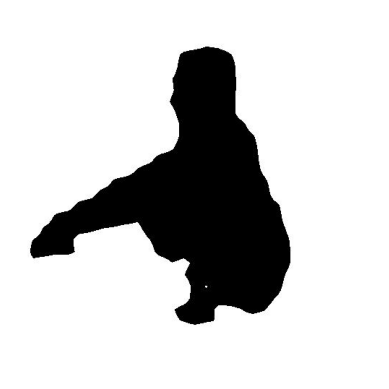

In [ ]:
for i in range(2768, train_size):
  print( str(i) + " " + image_datasets.imgs[train_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])
  img = Image.open(image_datasets.imgs[train_dataset[i]][0])
  f = np.array(img)
  plt.imshow(f)
  plt.axis('off')
  plt.savefig('gdrive/MyDrive/Projeto/data/Dataset_split/train/' + image_datasets.imgs[train_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])

In [ ]:
image_datasets.imgs[0]

783 lying/1007.jpg
784 standing/82.jpg
785 standing/868.jpg
786 standing/831.jpg
787 bending/764.jpg
788 bending/386.jpg
789 sitting/1046.jpg


KeyboardInterrupt: ignored

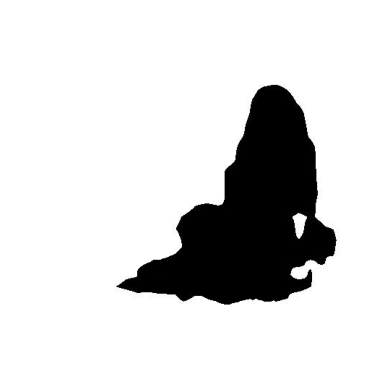

In [ ]:
for i in range(783,test_size):
  print( str(i) + " " + image_datasets.imgs[test_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])
  img = Image.open(image_datasets.imgs[test_dataset[i]][0])
  f = np.array(img)
  plt.imshow(f)
  plt.axis('off')
  plt.savefig('gdrive/MyDrive/Projeto/data/Dataset_split/test/' + image_datasets.imgs[test_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])

595 standing/148.jpg
596 sitting/761.jpg
597 sitting/659.jpg
598 sitting/587.jpg
599 lying/180.jpg
600 sitting/565.jpg
601 standing/599.jpg
602 sitting/492.jpg
603 lying/347.jpg
604 bending/1094.jpg
605 lying/474.jpg
606 sitting/1078.jpg
607 bending/383.jpg
608 lying/759.jpg
609 bending/303.jpg
610 sitting/1123.jpg
611 standing/788.jpg
612 standing/638.jpg
613 lying/80.jpg
614 bending/644.jpg
615 lying/383.jpg
616 lying/87.jpg
617 standing/118.jpg
618 standing/1015.jpg
619 bending/752.jpg
620 sitting/1024.jpg
621 lying/407.jpg
622 sitting/837.jpg
623 lying/380.jpg
624 bending/738.jpg
625 standing/929.jpg
626 standing/996.jpg
627 standing/740.jpg
628 bending/312.jpg
629 bending/471.jpg
630 bending/654.jpg
631 lying/809.jpg
632 bending/275.jpg
633 sitting/477.jpg
634 standing/244.jpg
635 bending/645.jpg
636 lying/126.jpg
637 sitting/1102.jpg
638 lying/787.jpg
639 bending/543.jpg
640 bending/585.jpg
641 standing/268.jpg
642 standing/451.jpg
643 lying/686.jpg
644 lying/373.jpg
645 sitting/

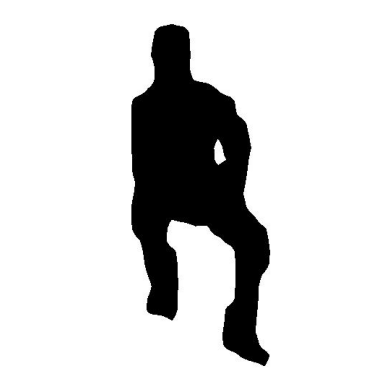

In [ ]:
for i in range(856,val_size):
  print( str(i) + " " + image_datasets.imgs[val_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])
  img = Image.open(image_datasets.imgs[val_dataset[i]][0])
  f = np.array(img)
  plt.imshow(f)
  plt.axis('off')
  plt.savefig('gdrive/MyDrive/Projeto/data/Dataset_split/val/' + image_datasets.imgs[val_dataset[i]][0].split("gdrive/MyDrive/Projeto/data/raw/human_silhouettes/")[1])

In [ ]:
print(train_dataset.indices[:])

In [ ]:
print(test_dataset.indices[:])

In [ ]:
print(val_dataset.indices[:])

17 de maio de 2023 as 17h25